In [1]:
from google.colab import drive as drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Access a public Github repos
!rm -rf /content/Osteoporosis-Knee-Xray-Dataset # remove git clone
%cd '/content'
!git clone https://github.com/ricardotran92/Osteoporosis-Knee-Xray-Dataset.git

/content
Cloning into 'Osteoporosis-Knee-Xray-Dataset'...
remote: Enumerating objects: 364, done.
remote: Total 364 (delta 0), reused 0 (delta 0), pack-reused 364
Receiving objects: 100% (364/364), 272.03 MiB | 30.88 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (413/413), done.


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image


In [4]:
# @title
def DataSetSummary (local_path, tabs):
  # Take list of files & folders in local folder
  all_items = os.listdir(local_path)

  # Filter folder list
  folders = [item for item in all_items if os.path.isdir(os.path.join(local_path, item))]

  # Print summary information if folders > 0:
  if(len(folders) > 0):
    indent = '\t' * tabs
    print("{}Tổng số thư mục: {}".format(indent, len(folders)))
    for folder in folders:
      folder_path = os.path.join(local_path, folder)
      files_in_folder = len(os.listdir(folder_path))
      print("{}-Thư mục: {}, Số tệp: {}".format(indent, folder, files_in_folder))
      DataSetSummary(folder_path, tabs+1)

# DataSetSummary(local_path, 0)

In [5]:
# import os

# Hierarchical local folder in Colab
repository_folder = ["Osteoporosis-Knee-Xray-Dataset"]

for folder in repository_folder:
  local_path = '/content/' + folder + '/dataset'
  DataSetSummary(local_path, 0)
  local_path = '/content/' + folder + '/sample'
  DataSetSummary(local_path, 0)

Tổng số thư mục: 2
-Thư mục: normal, Số tệp: 186
-Thư mục: osteoporosis, Số tệp: 186
Tổng số thư mục: 2
-Thư mục: normal, Số tệp: 20
-Thư mục: osteoporosis, Số tệp: 20


In [6]:
# Set the path to your dataset
dataset_path = '/content/Osteoporosis-Knee-Xray-Dataset/sample'
# dataset_path = '/content/Osteoporosis-Knee-Xray-Dataset/dataset'

Class normal


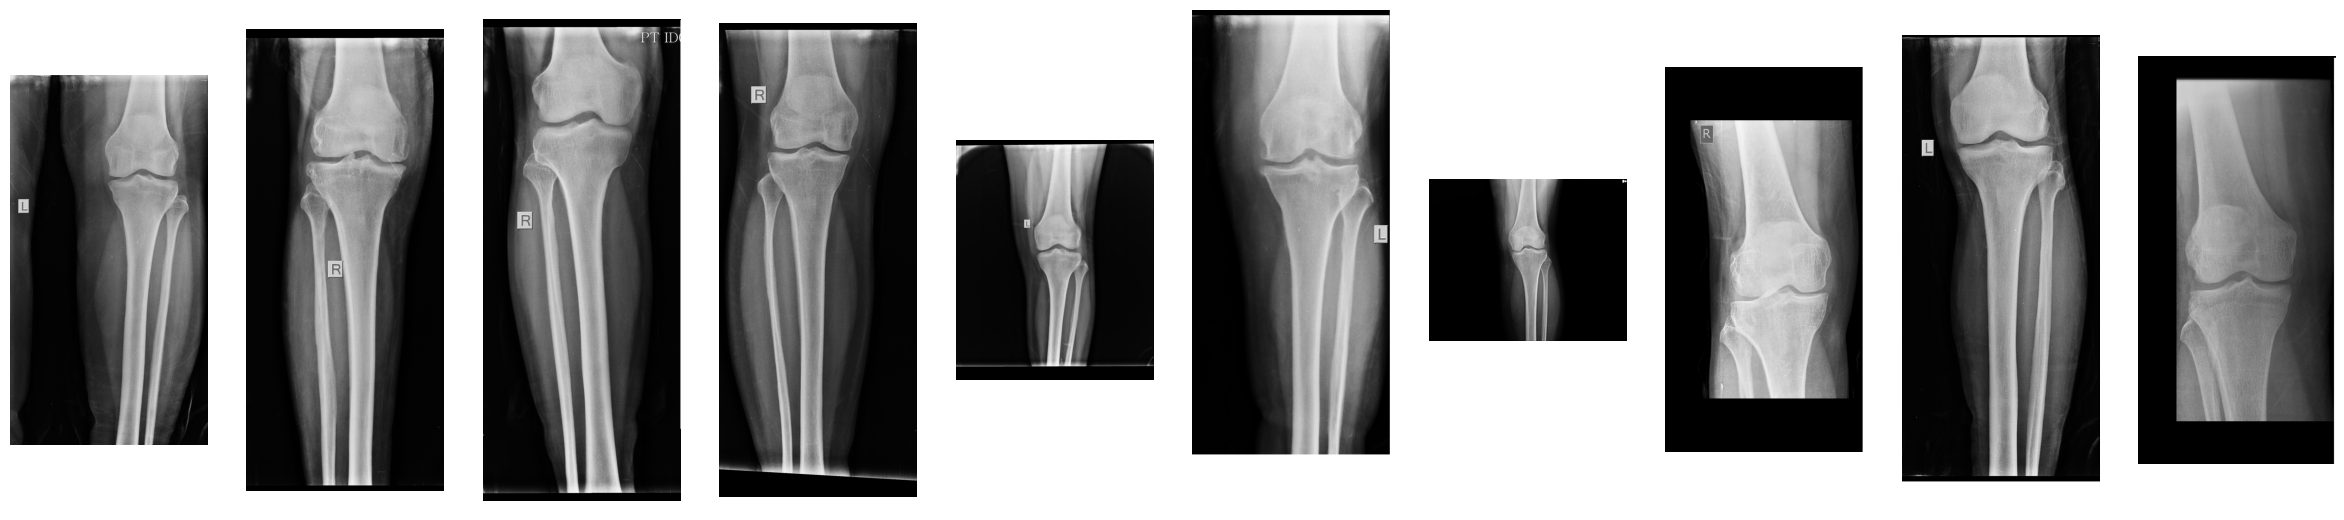

Class osteoporosis


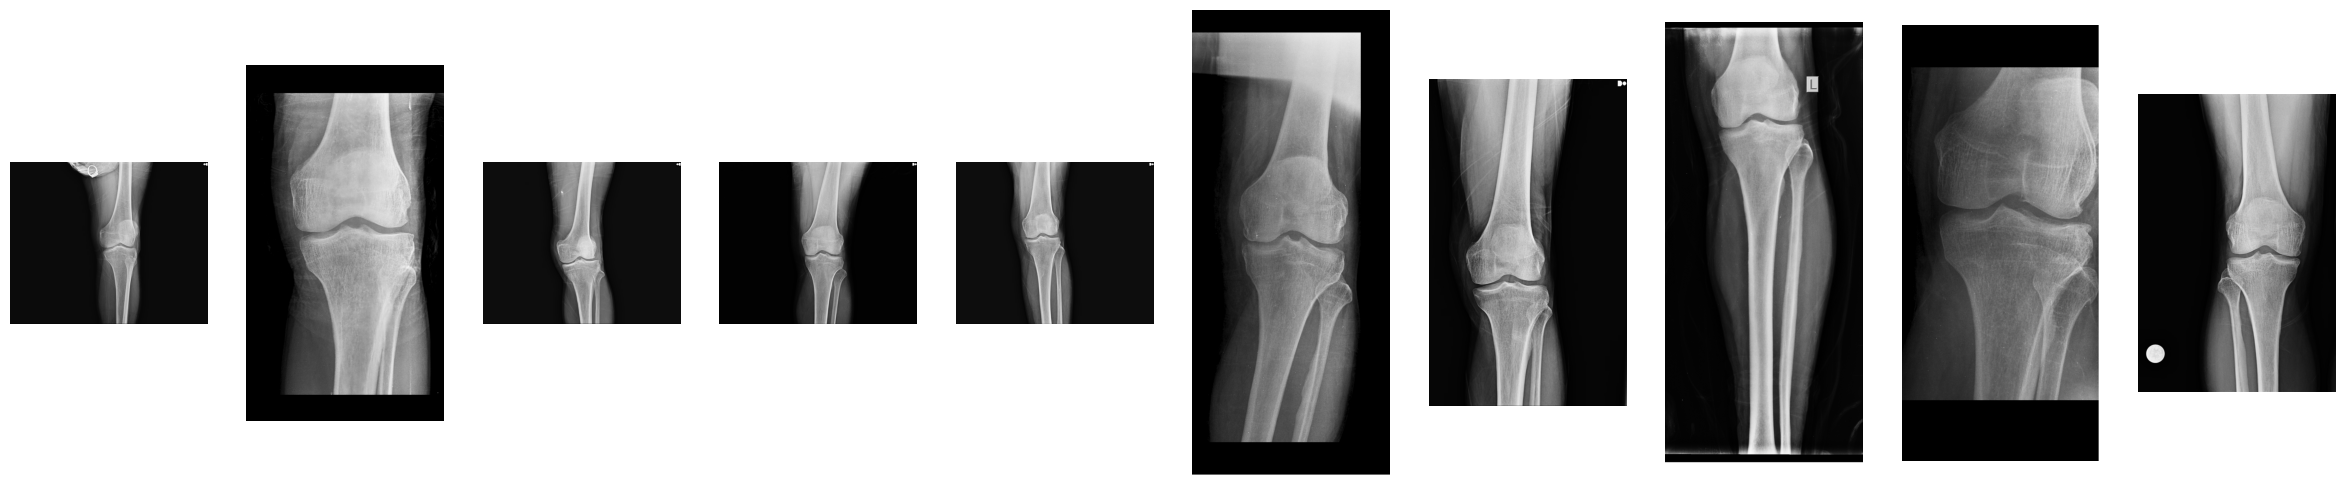

In [7]:
class Image:
    def __init__(self, path, label):
        # self.image = cv2.imread(path) # directly read
        self.path = path # only directory
        self.label = label

def load_images_from_folder(dataset_path, images_per_class=None):
    images = {}
    for class_name in os.listdir(dataset_path):
        class_folder_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder_path):
            count = 0
            images[class_name] = []
            for image_name in os.listdir(class_folder_path):
                if images_per_class is None or count < images_per_class:
                    image_path = os.path.join(class_folder_path, image_name)
                    img = Image(image_path, class_name)
                    images[class_name].append(img)
                    count += 1
    return images

def imshow(images, images_per_class=None):
    for class_name, imgs in images.items():
        plt.figure(figsize=(30,30))
        print(f'Class {class_name}')
        for i in range(min(images_per_class if images_per_class else len(imgs), len(imgs))):
            plt.subplot(1, images_per_class if images_per_class else len(imgs), i+1)
            img = cv2.imread(imgs[i].path)
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            # plt.title(os.path.basename(imgs[i].path))
            plt.axis('off')
        plt.show()

# Example usage:
images = load_images_from_folder('/content/Osteoporosis-Knee-Xray-Dataset/dataset')
imshow(images, 10)


In [8]:
from PIL import Image

def get_image_specifications(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Get image specifications
        image_format = img.format
        image_mode = img.mode
        image_size = img.size
        image_width, image_height = img.size
        image_color = img.getcolors()

    return f"Image Format: {image_format}\nImage Mode: {image_mode}\nImage Size: {image_size} pixels (Width: {image_width}, Height: {image_height})\nImage Colors: {image_color}"

# Example usage:
print('images.keys:', images.keys())
image_path = "/content/Osteoporosis-Knee-Xray-Dataset/dataset/osteoporosis/1.JPEG"
# print('image_path:',image_path := images['normal'][0].path)
image_specifications = get_image_specifications(image_path)
print(image_specifications)

images.keys: dict_keys(['normal', 'osteoporosis'])
Image Format: JPEG
Image Mode: RGB
Image Size: (514, 1024) pixels (Width: 514, Height: 1024)
Image Colors: [(1023, (255, 255, 255)), (5, (253, 253, 253)), (27, (251, 251, 251)), (52, (249, 249, 249)), (90, (247, 247, 247)), (153, (245, 245, 245)), (204, (243, 243, 243)), (257, (241, 241, 241)), (294, (239, 239, 239)), (347, (237, 237, 237)), (489, (235, 235, 235)), (565, (233, 233, 233)), (820, (231, 231, 231)), (1098, (229, 229, 229)), (1522, (227, 227, 227)), (1904, (225, 225, 225)), (2021, (223, 223, 223)), (1893, (221, 221, 221)), (1790, (219, 219, 219)), (1809, (217, 217, 217)), (1956, (215, 215, 215)), (2149, (213, 213, 213)), (2353, (211, 211, 211)), (2628, (209, 209, 209)), (2656, (207, 207, 207)), (2824, (205, 205, 205)), (2604, (203, 203, 203)), (2609, (201, 201, 201)), (2652, (199, 199, 199)), (2739, (197, 197, 197)), (2909, (195, 195, 195)), (3145, (193, 193, 193)), (3324, (191, 191, 191)), (3390, (189, 189, 189)), (3432, (

## CLAHE + median filter

In [9]:
import pywt
def preprocess_func(image):
    # Unsharp Masking
    blurred = cv2.GaussianBlur(image, (0, 0), 3)
    unsharp_mask = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)

    # Bilateral Filter Denoising
    denoised_image = cv2.bilateralFilter(unsharp_mask, d=9, sigmaColor=75, sigmaSpace=75)

    # return result
    return denoised_image

In [10]:
import os
import cv2
import numpy as np
from shutil import copyfile

def preprocess_and_copy(src_dir, dest_dir, preprocess_func):
    # Check if src_dir is a directory
    if os.path.isdir(src_dir):
        # If dest_dir does not exist, create it
        os.makedirs(dest_dir, exist_ok=True)

        # Iterate over files/directories in src_dir
        for item in os.listdir(src_dir):
            src_item_path = os.path.join(src_dir, item)

            # If item is a directory, call function recursively
            if os.path.isdir(src_item_path):
                preprocess_and_copy(src_item_path, os.path.join(dest_dir, item), preprocess_func)
            # If item is a file, apply preprocessing and copy
            elif os.path.isfile(src_item_path):
                # Define the output file path
                filename_with_ext = os.path.basename(src_item_path)
                filename, extension = os.path.splitext(filename_with_ext)
                dest_item_path = os.path.join(dest_dir, filename + '.jpg')

                # Check if output file already exists
                if not os.path.exists(dest_item_path):
                    img = cv2.imread(src_item_path)
                    if img is not None:
                        img = preprocess_func(img)

                        # Export the preprocessed image to the output folder
                        cv2.imwrite(dest_item_path, img)

In [11]:
# Usage:
# dataset_path = '/content/Osteoporosis-Knee-Xray-Dataset/sample'
# output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Osteoporosis-Knee-Xray-Dataset/CLAHE_medianF3x3_sample'
dataset_path = '/content/Osteoporosis-Knee-Xray-Dataset/dataset'
output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/02_08_unsharpMasking'
preprocess_and_copy(dataset_path, output_path, preprocess_func)

In [ ]:
import matplotlib.pyplot as plt

# Display the image
plt.imshow(reversed_img)
plt.axis('off')
plt.show()

In [ ]:
import cv2
import numpy as np
import pywt
# Đọc ảnh cần xử lý
image_path = '/content/Osteoporosis-Knee-Xray-Dataset/dataset/osteoporosis/1.JPEG'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Áp dụng biến đổi sóng và lọc nhiễu cho ảnh
denoised_image = preprocess_func(img)


# Hiển thị ảnh gốc và ảnh đã xử lý bằng Matplotlib
plt.figure(figsize=(10, 5))

# Ảnh gốc
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Ảnh đã xử lý
plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

plt.show()